In [6]:
import os
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = [25, 15]
plt.rcParams.update({'font.size': 20})

In [2]:
dirin = os.path.join("..", "..", "Data", "neutrons")
files = ["LGND_200_NeutronOpticalSim_1000_part1.csv", "LGND_200_NeutronOpticalSim_1000_part2.csv", 
        "LGND_200_NeutronOpticalSim_1000_part3.csv", "LGND_200_NeutronOpticalSim_1000_part4.csv", 
        "LGND_200_NeutronOpticalSim_1000_part5.csv"]
df = pd.read_csv(os.path.join(dirin, files[0]), index_col=False)
print("Processing File {}".format(files[0]))
for file in files[1:]:
    print("Processing File {}".format(file))
    df = pd.concat([df, pd.read_csv(os.path.join(dirin, file), index_col=False)])
df.head()

Processing File LGND_200_NeutronOpticalSim_1000_part2.csv
Processing File LGND_200_NeutronOpticalSim_1000_part3.csv
Processing File LGND_200_NeutronOpticalSim_1000_part4.csv
Processing File LGND_200_NeutronOpticalSim_1000_part5.csv


In [3]:
events_ar41 = df[(df.PID==1000180410) & (df.creatorprocess=='nCapture')].eventnumber.unique()
print("[Info] There are {} events of Ar41 de-excitation (over {} events)".format(len(events_ar41), df.eventnumber.nunique()))

[Info] There are 10 events of Ar41 de-excitation (over 499 events)


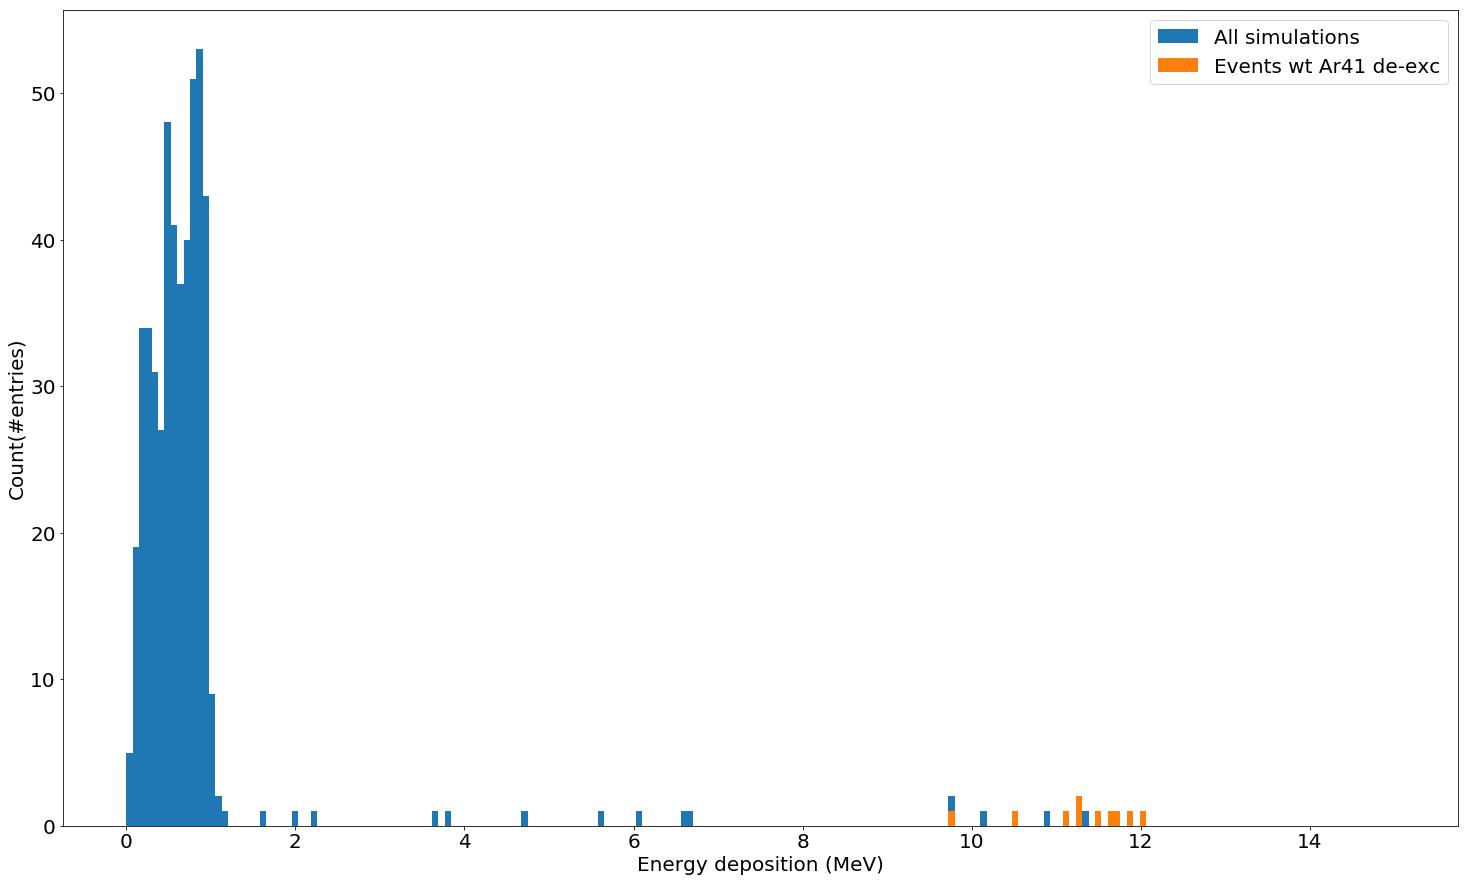

In [7]:
import numpy as np
bins = np.linspace(0, 15, 200)
plt.hist(df.groupby("eventnumber").energydeposition.sum(), bins=bins, label="All simulations")
plt.hist(df[df.eventnumber.isin(events_ar41)].groupby("eventnumber").energydeposition.sum(), bins=bins, label="Events wt Ar41 de-exc")
plt.legend()
plt.xlabel("Energy deposition (MeV)")
plt.ylabel("Count(#entries)")
plt.show()

In [ ]:
gammas = df[(df.PID==22) & (df.eventnumber.isin(events_ar41)) & (df.creatorprocess=='nCapture') & (df.ParentTrackID==1)].sort_values("time")
gammas

In [ ]:
first_gammas = gammas.sort_values("time").groupby(["eventnumber", "tracknumber"]).first()

In [ ]:
plt.hist(first_gammas.kineticenergy, bins=200, alpha=1)
plt.xlabel("Kinetic Energy of Gammas (MeV)")
plt.show()

In [ ]:
nzero_df = df[df.energydeposition>0]
plt.scatter(nzero_df.x, nzero_df.y, color='g', label="Edep>0")
plt.title("Energy depositions - X,Y Axis")
plt.legend()
plt.show()

2


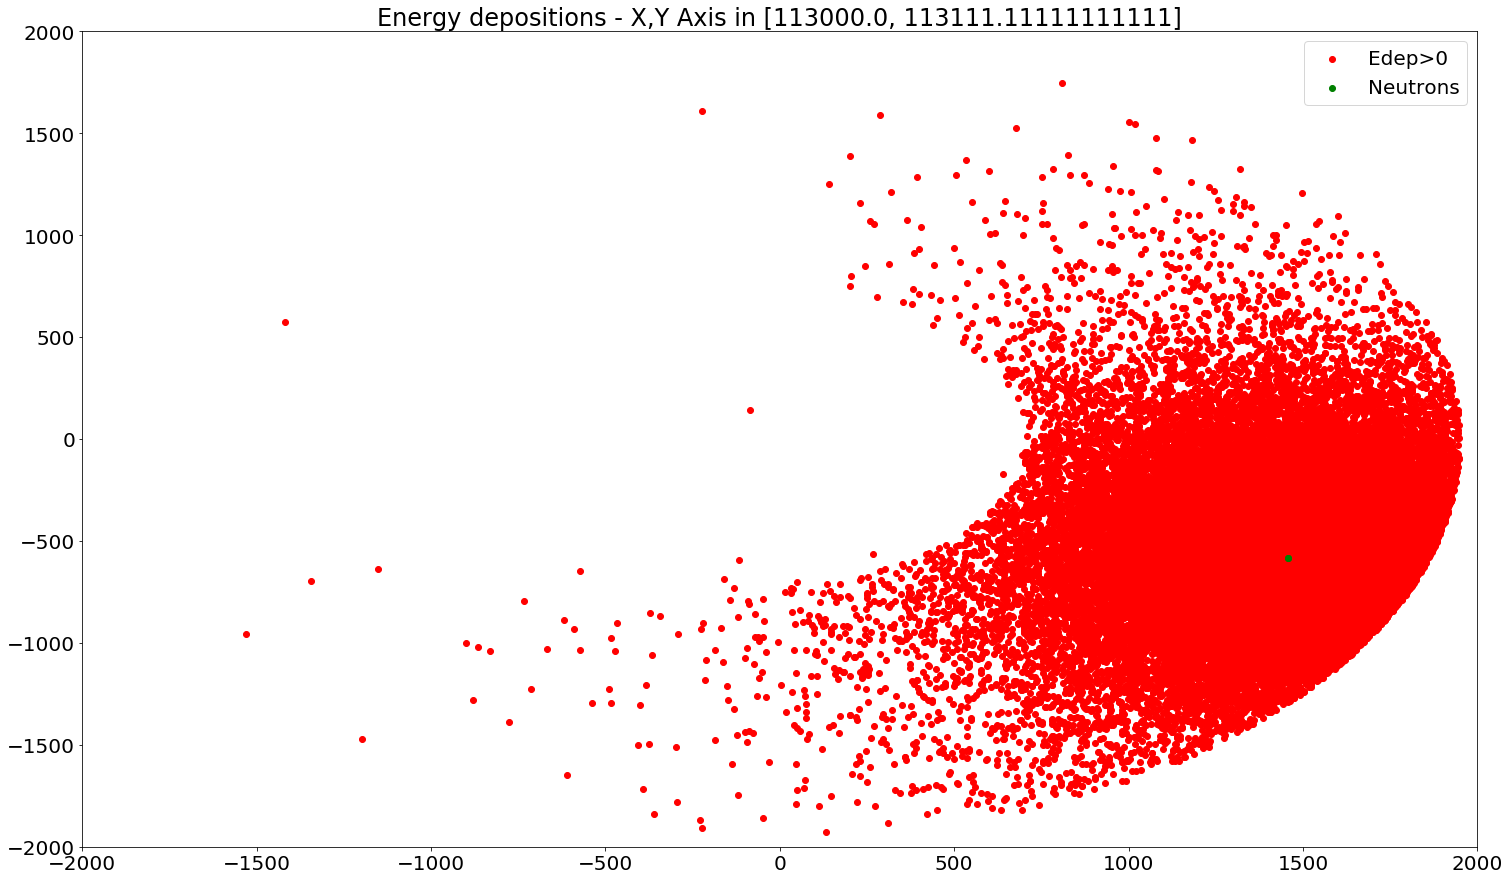

0


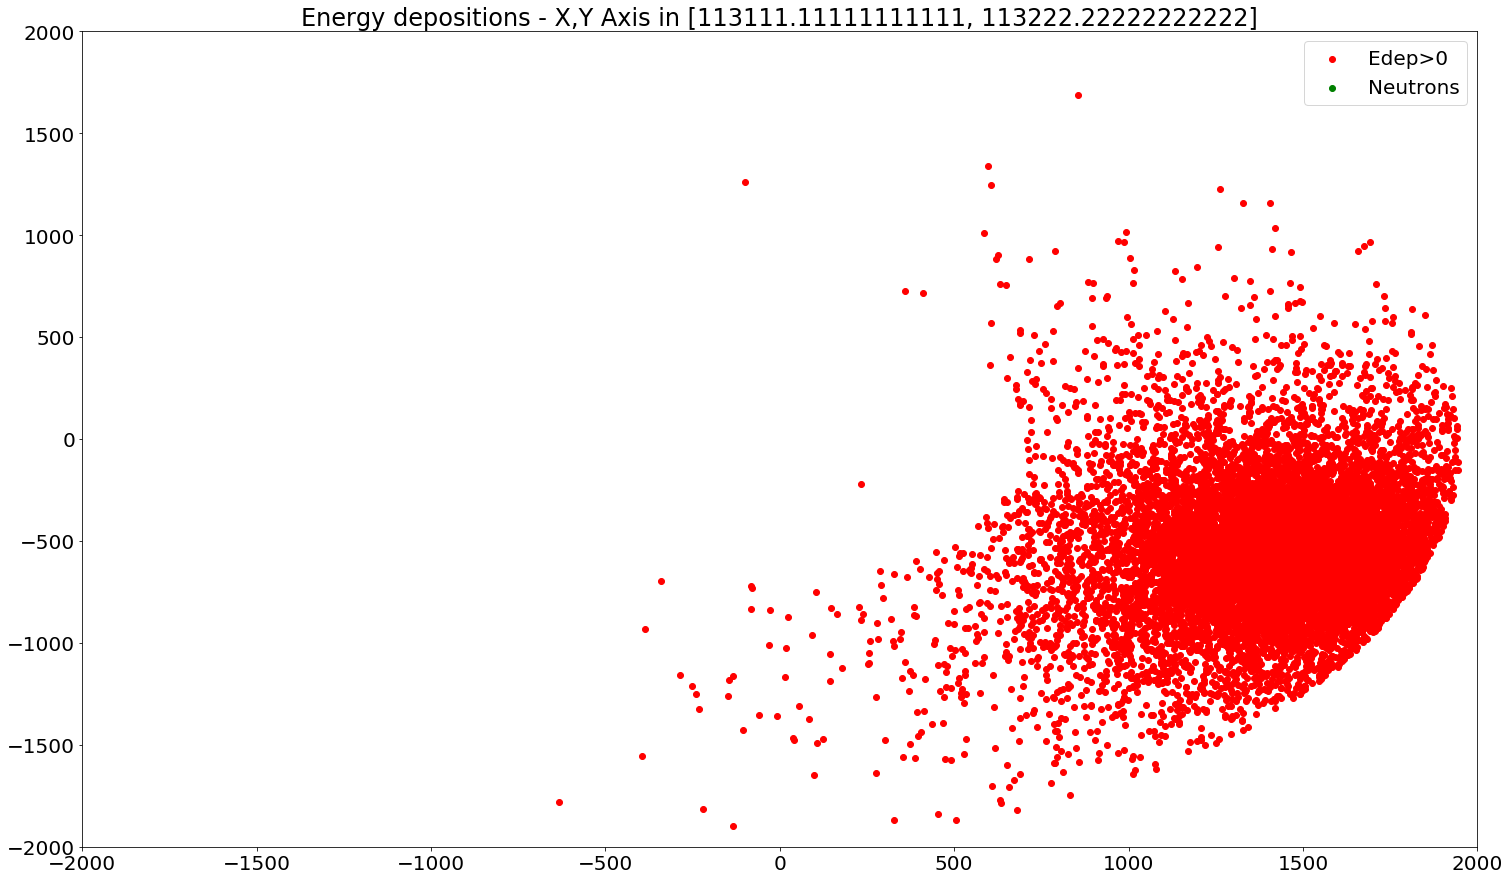

0


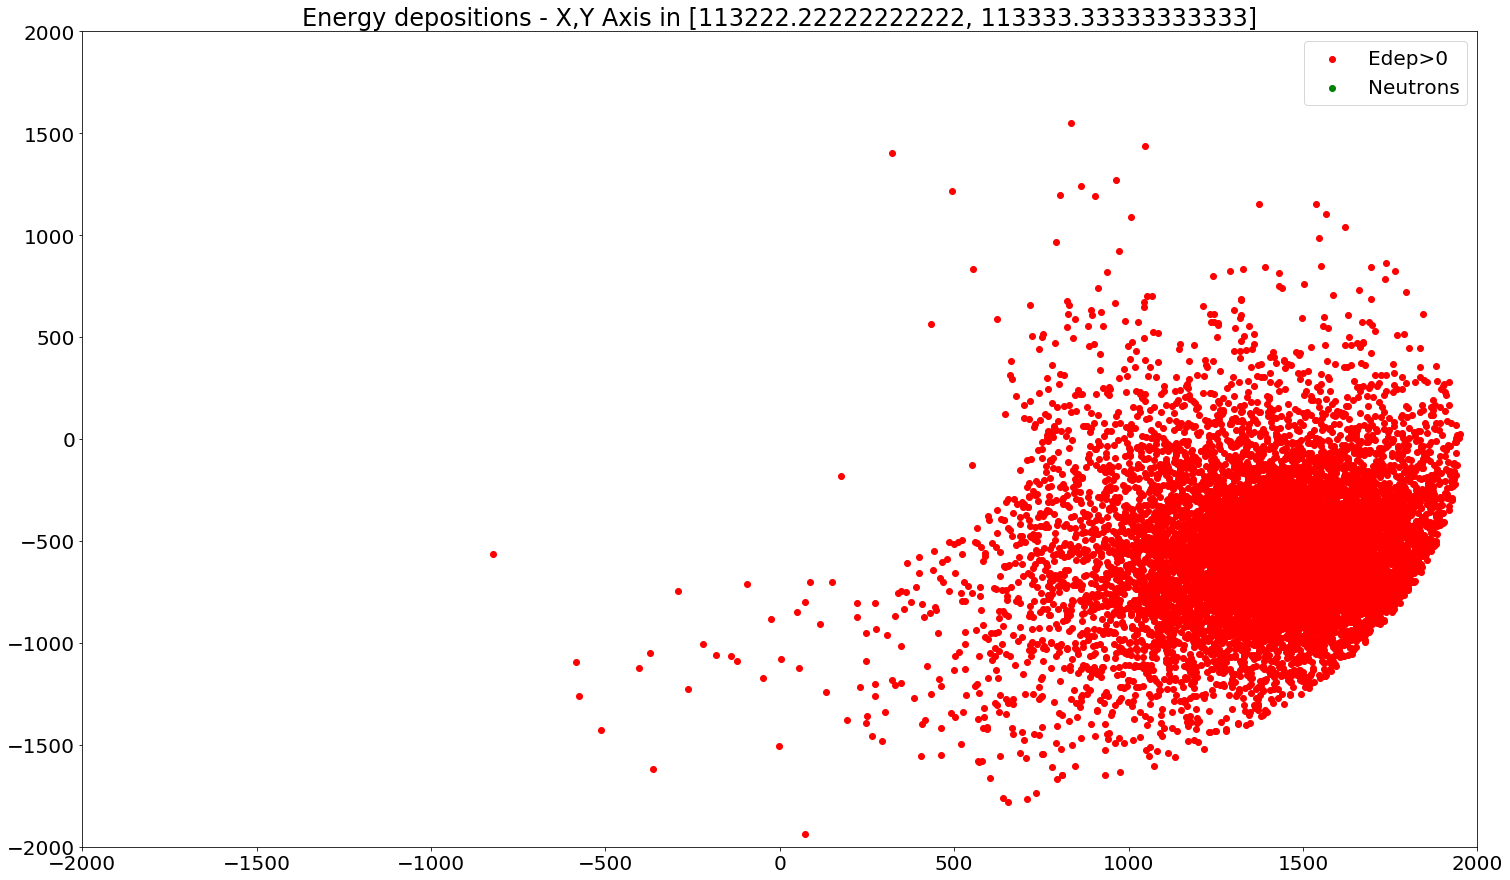

0


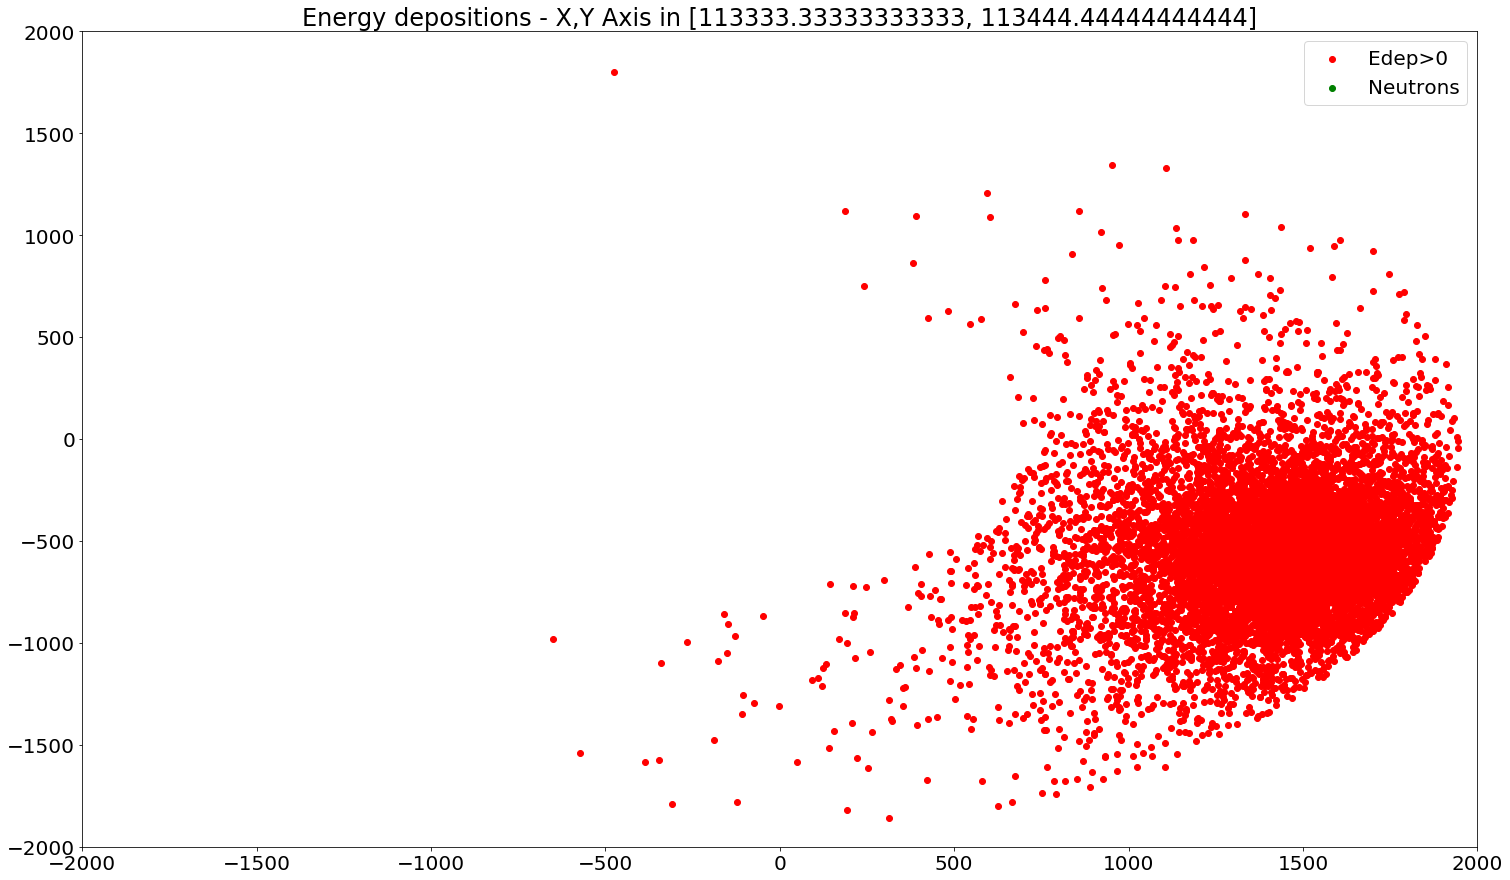

0


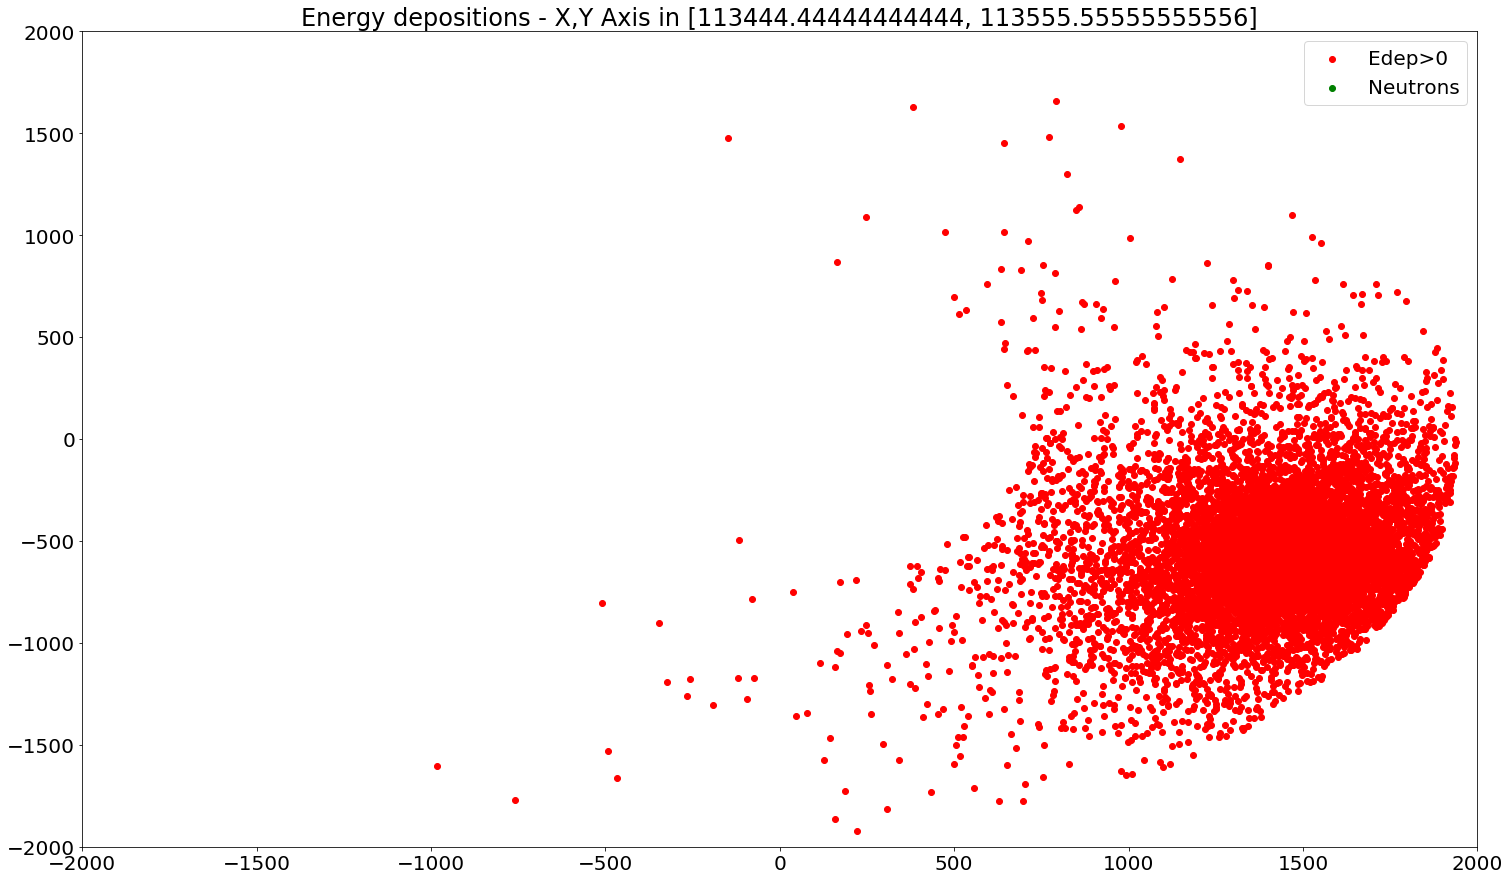

0


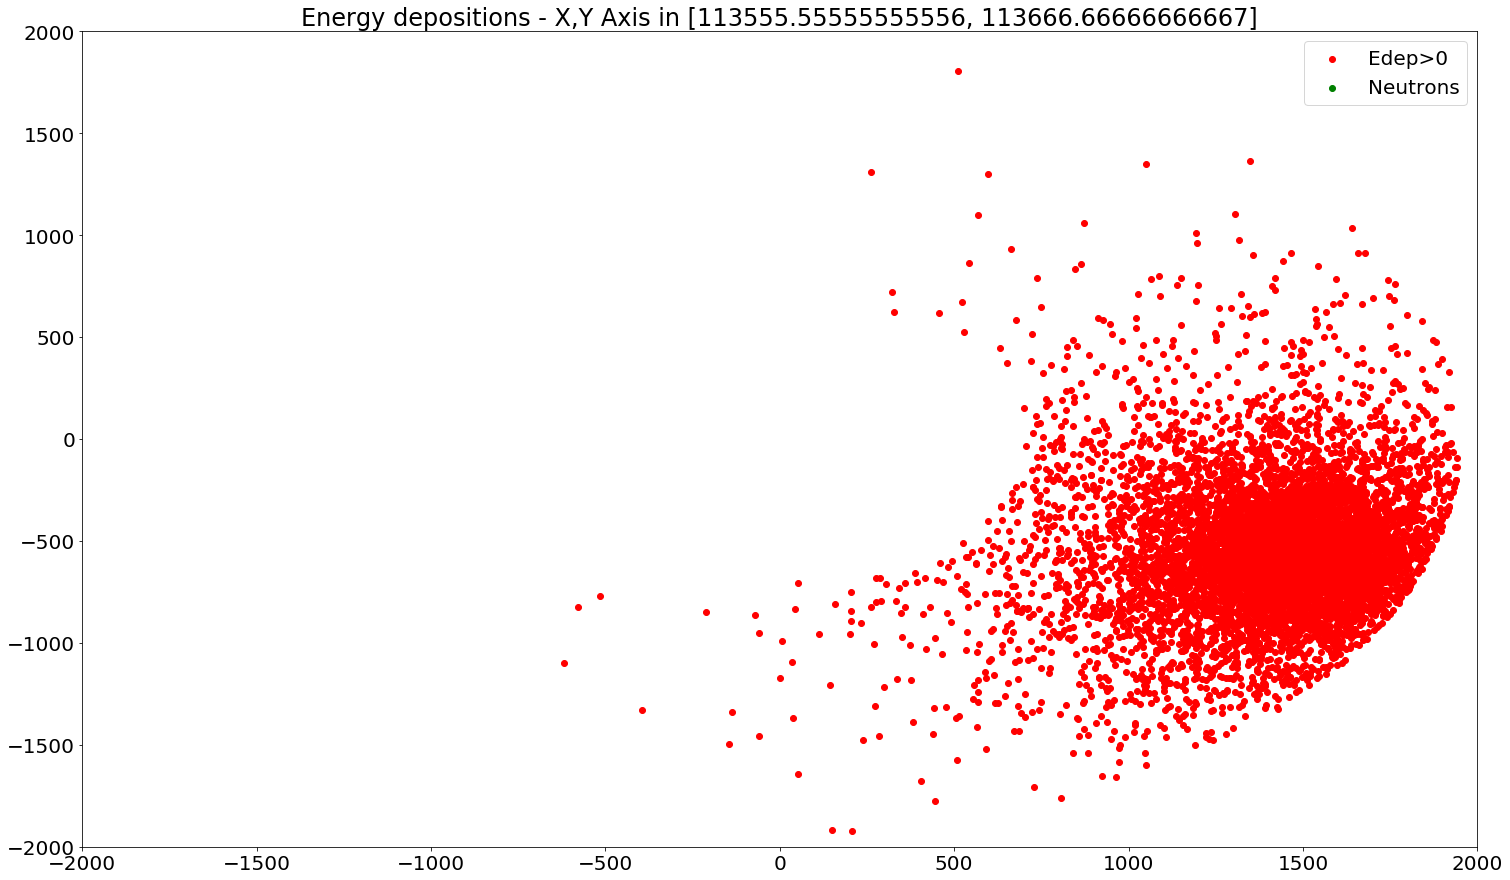

0


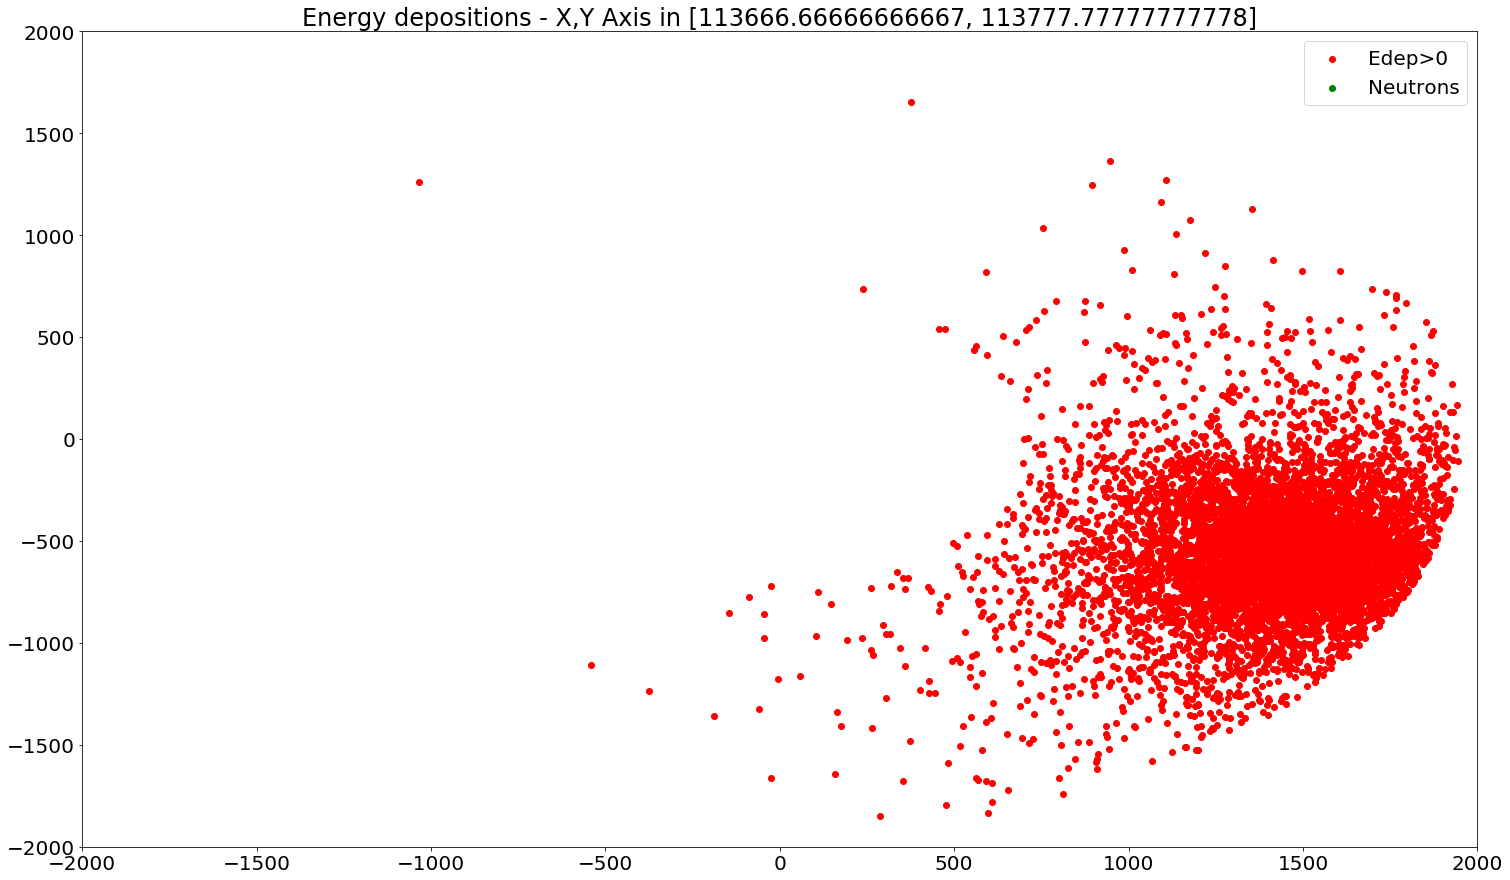

0


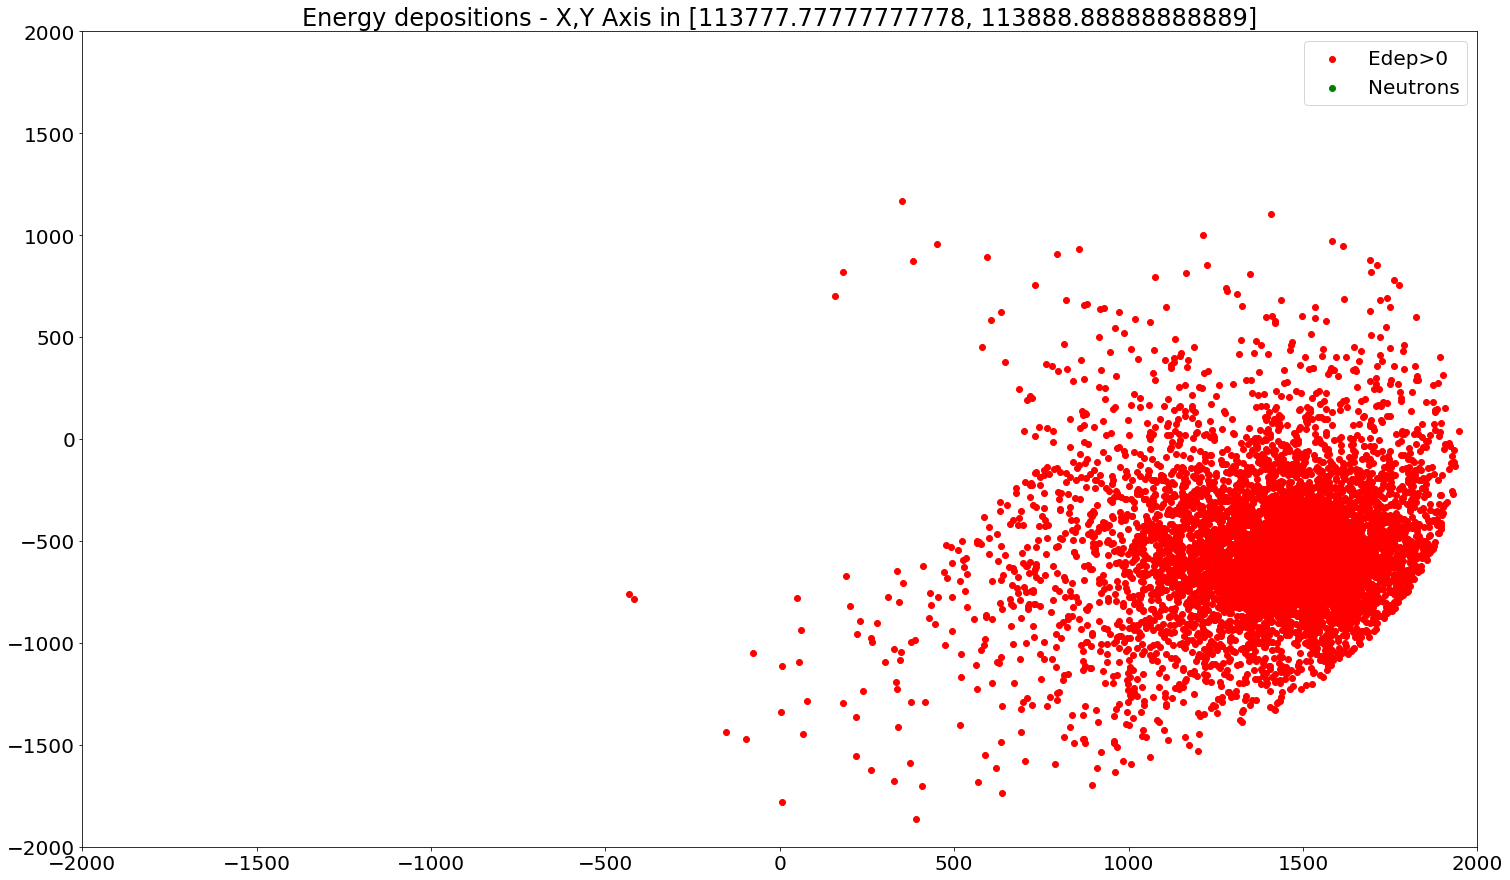

0


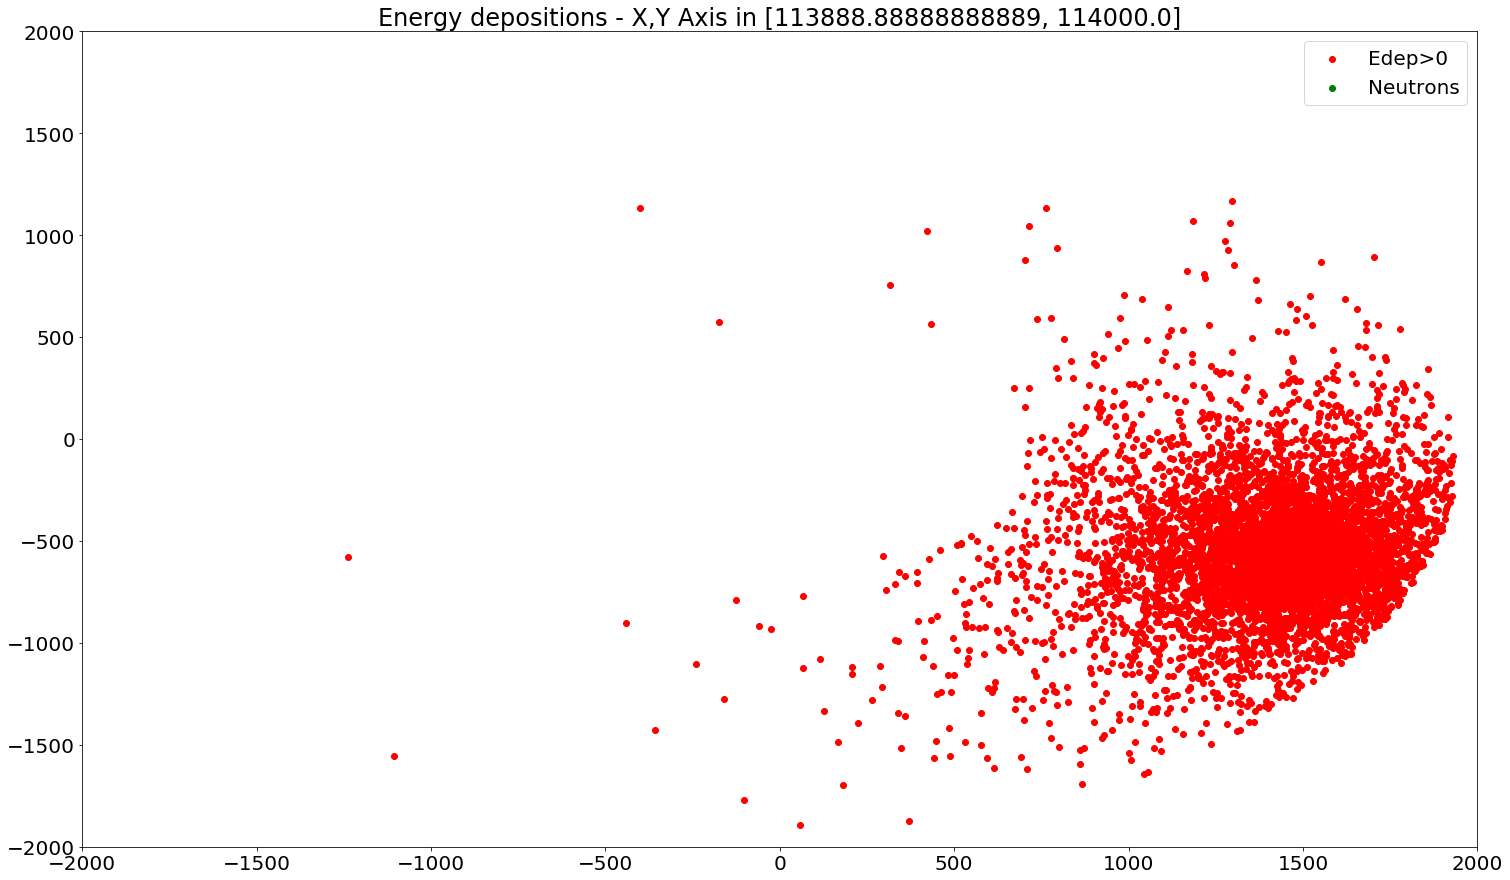

In [45]:
time = np.linspace(113000, 114000, 10)
event0 = df[(df.eventnumber==25)]
for t1, t2 in zip(time[:-1], time[1:]):
    event0_t1t2 = event0[(event0.time>t1) & (event0.time<=t2)]
    plt.scatter(event0_t1t2[event0_t1t2.energydeposition>0].x, event0_t1t2[event0_t1t2.energydeposition>0].y, color='r', label="Edep>0")
    plt.scatter(event0_t1t2[event0_t1t2.PID==1000180410].x, event0_t1t2[event0_t1t2.PID==1000180410].y, color='g', label="Neutrons")
    print(len(event0_t1t2[event0_t1t2.PID==1000180410]))
    plt.title("Energy depositions - X,Y Axis in [{}, {}]".format(t1, t2))
    plt.legend()
    plt.xlim(-2000, +2000)
    plt.ylim(-2000, +2000)
    plt.pause(0.001)

In [39]:
event0[event0.PID==1000180410]

,PID,ParentTrackID,energydeposition,kineticenergy,time,x,y,z,px,py,pz,eventnumber,tracknumber,creatorprocess,volumeID,parentnucleusPID
699664,1000180410,1,0.000000,0.000379,113034.227455,1456.368077,-583.080817,218.195655,-2.925399,1.356948,-4.300911,25,8506,nCapture,201,666
699665,1000180410,1,0.000379,0.000000,113034.228632,1456.368050,-583.080805,218.195615,-0.000000,0.000000,-0.000000,25,8506,ionIoni,201,666
